In [2]:
"""SEQN: Sequence number (identifier)
RIAGENDR: Respondent's Gender (1=Male, 2=Female)
PAQ605: Physical activity questionnaire response: If the respondent engages in moderate or vigorous-intensity sports, fitness, or recreational activities in the typical week
BMXBMI: Body Mass Index
LBXGLU: Glucose level
DIQ010: Diabetes questionnaire response
LBXGLT: Glucose tolerance (Oral)
LBXIN: Insulin level"""

"SEQN: Sequence number (identifier)\nRIAGENDR: Respondent's Gender (1=Male, 2=Female)\nPAQ605: Physical activity questionnaire response: If the respondent engages in moderate or vigorous-intensity sports, fitness, or recreational activities in the typical week\nBMXBMI: Body Mass Index\nLBXGLU: Glucose level\nDIQ010: Diabetes questionnaire response\nLBXGLT: Glucose tolerance (Oral)\nLBXIN: Insulin level"

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
df = pd.read_csv("Train_Data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB


In [5]:
df.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [6]:
df.shape

(1966, 9)

In [7]:
df.isnull().sum()

,0
SEQN,12
RIAGENDR,18
PAQ605,13
BMXBMI,18
LBXGLU,13
DIQ010,18
LBXGLT,11
LBXIN,9
age_group,14


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SEQN,1954.0,NaN,NaN,NaN,78683.621801,2924.115709,73564.0,76194.0,78717.0,81217.0,83727.0
RIAGENDR,1948.0,NaN,NaN,NaN,1.510267,0.500023,1.0,1.0,2.0,2.0,2.0
PAQ605,1953.0,NaN,NaN,NaN,1.825397,0.399449,1.0,2.0,2.0,2.0,7.0
BMXBMI,1948.0,NaN,NaN,NaN,27.9654,7.327616,14.5,22.8,26.8,31.3,70.1
LBXGLU,1953.0,NaN,NaN,NaN,99.491039,16.774665,63.0,91.0,97.0,104.0,405.0
DIQ010,1948.0,NaN,NaN,NaN,2.015914,0.187579,1.0,2.0,2.0,2.0,3.0
LBXGLT,1955.0,NaN,NaN,NaN,115.150384,46.271615,40.0,87.0,105.0,131.0,604.0
LBXIN,1957.0,NaN,NaN,NaN,11.862892,9.756713,0.14,5.8,9.03,14.48,102.29
age_group,1952,2,Adult,1638,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#duplicate data
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop("SEQN", axis = 1, inplace = True)

In [11]:
#Missing data handling
df_copy = df.copy(deep = True)

In [12]:
# Missing Value Count Function
def show_missing():
    missing = df_copy.columns[df_copy.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df_copy[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df_copy[show_missing()].isnull().sum().sort_values(ascending = False)/len(df_copy)*100,2))

Missing Data Count
RIAGENDR     18
BMXBMI       18
DIQ010       18
age_group    14
LBXGLU       13
PAQ605       13
LBXGLT       11
LBXIN         9
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
RIAGENDR     0.92
BMXBMI       0.92
DIQ010       0.92
age_group    0.71
LBXGLU       0.66
PAQ605       0.66
LBXGLT       0.56
LBXIN        0.46
dtype: float64


<Axes: >

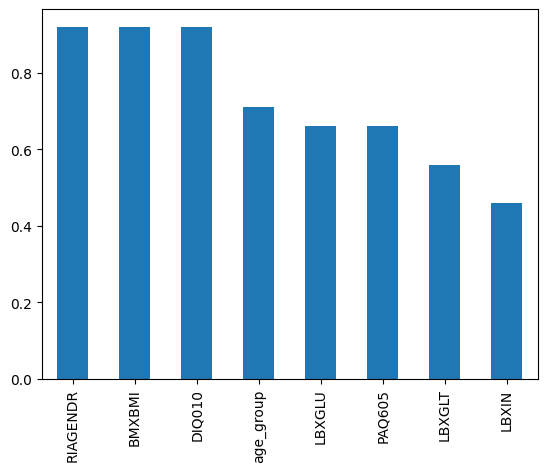

In [13]:
#histogram plot
round(df_copy[show_missing()].isnull().sum().sort_values(ascending = False)/len(df_copy)*100,2).plot(kind='bar')


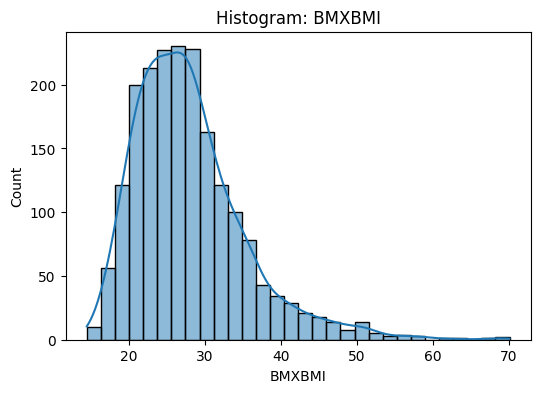

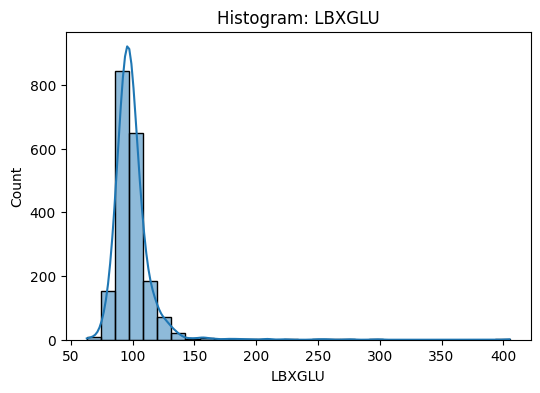

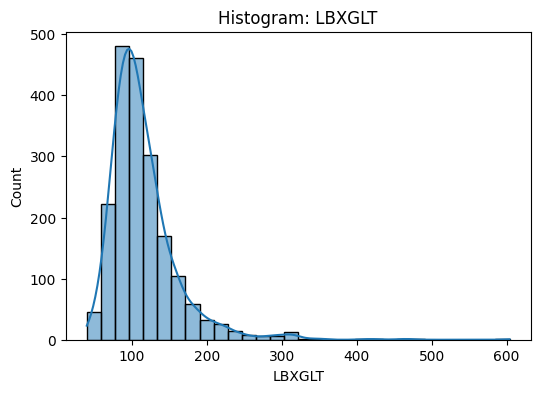

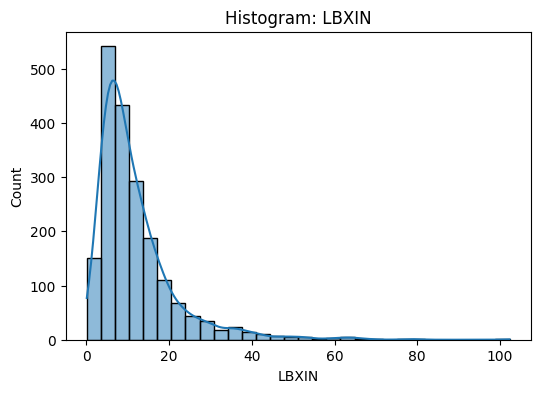

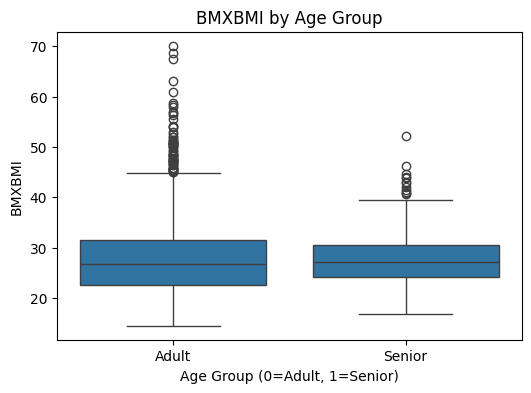

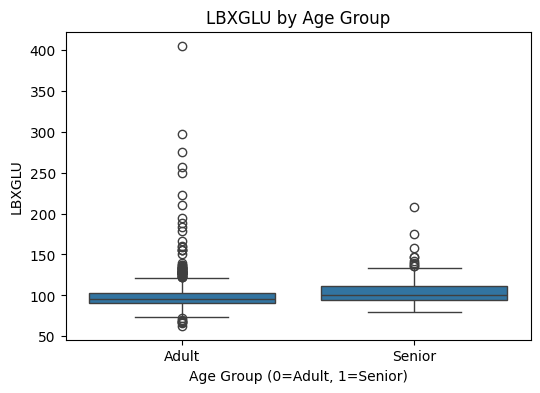

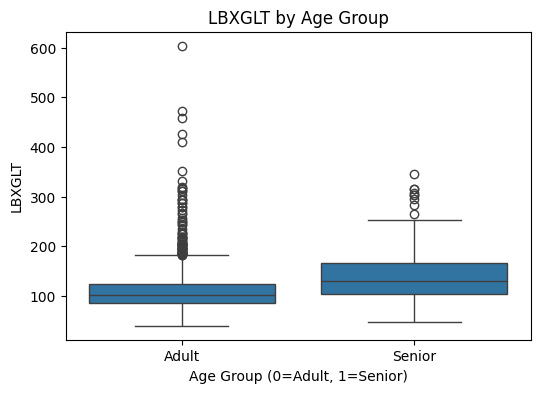

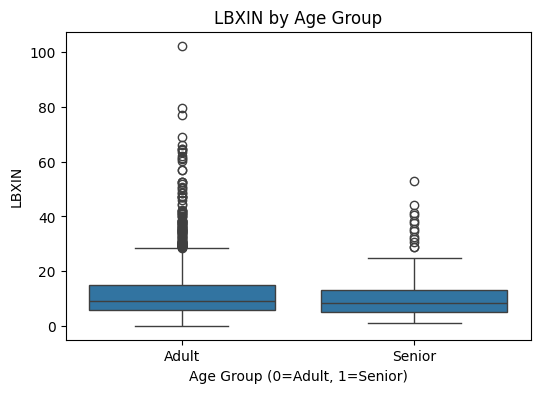

In [14]:
numeric_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

# Histograms
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Boxplots with respect to age_group
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='age_group', y=col)
    plt.title(f'{col} by Age Group')
    plt.xlabel('Age Group (0=Adult, 1=Senior)')
    plt.ylabel(col)
    plt.show()


In [15]:
# Function to impute missing values
def impute_missing_values(df):
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype in ['int64', 'float64']:
                # Impute numeric columns with median
                df[col].fillna(df[col].median(), inplace=True)
            else:
                # Impute categorical columns with mode
                df[col].fillna(df[col].mode()[0], inplace=True)
    return df

# Impute missing values in the DataFrame copy
df_copy = impute_missing_values(df_copy)

# Verify that there are no more missing values
print('Missing Data Count after imputation')
print(df_copy[show_missing()].isnull().sum().sort_values(ascending = False))

Missing Data Count after imputation
Series([], dtype: float64)


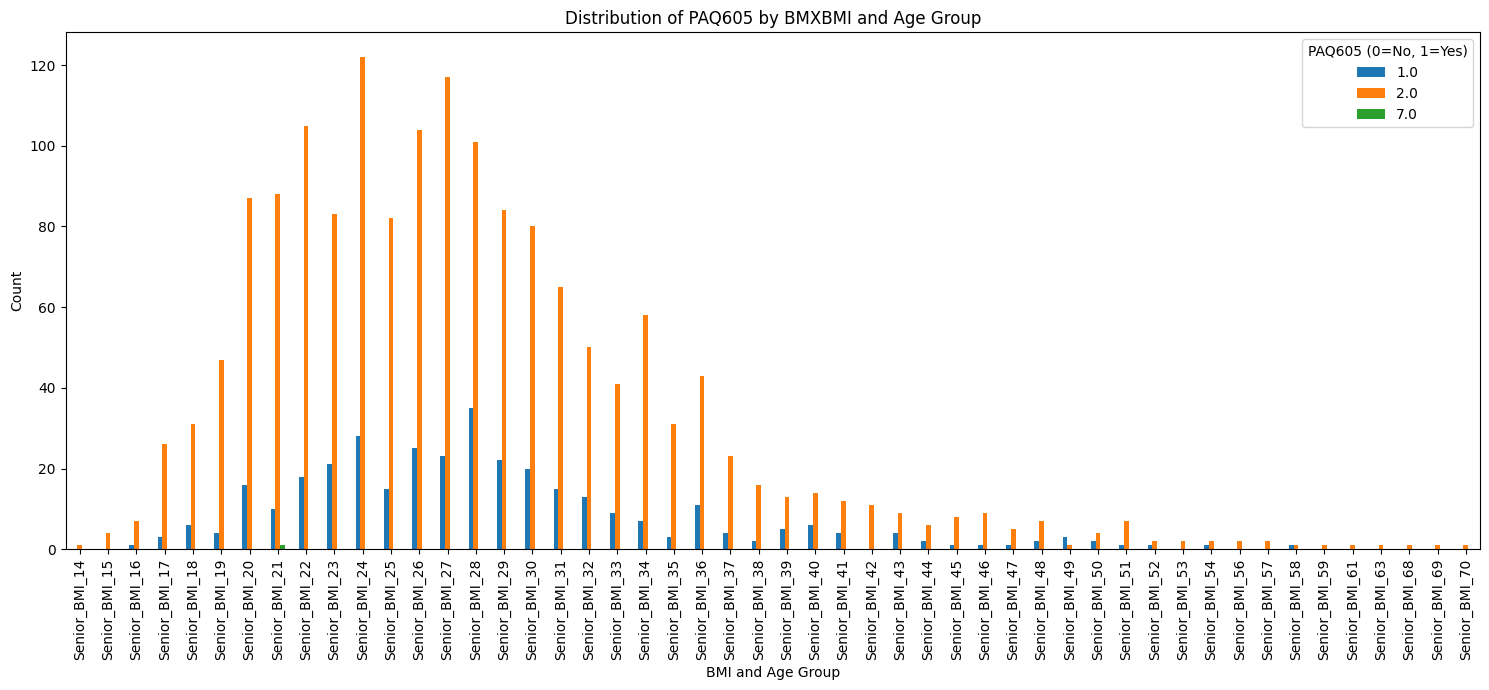

In [16]:
df_copy['BMI_Group'] = df_copy.apply(lambda row: f"Adult_BMI_{row['BMXBMI']:.0f}" if row['age_group'] == 0 else f"Senior_BMI_{row['BMXBMI']:.0f}", axis=1)

# Group by 'BMI_Group' and 'PAQ605', then count occurrences
bmi_paq_counts = df_copy.groupby(['BMI_Group', 'PAQ605']).size().unstack(fill_value=0)

# Plotting the bar chart
bmi_paq_counts.plot(kind='bar', figsize=(15, 7))
plt.title('Distribution of PAQ605 by BMXBMI and Age Group')
plt.xlabel('BMI and Age Group')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='PAQ605 (0=No, 1=Yes)')
plt.tight_layout()
plt.show()

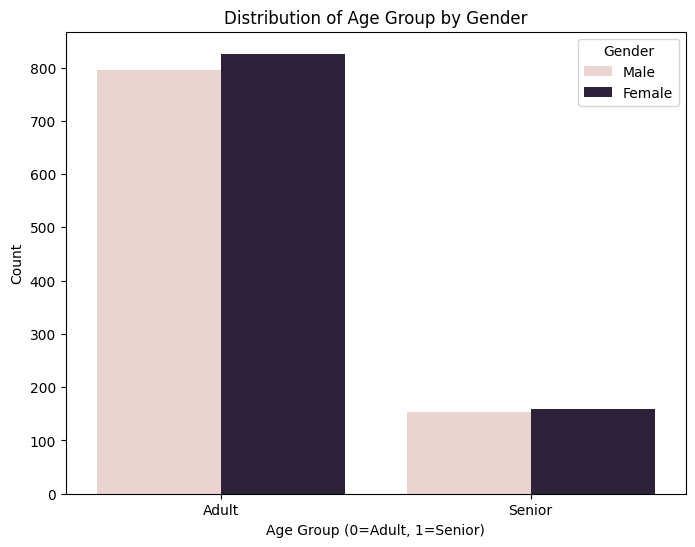

In [17]:
# Age vs. Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='age_group', hue='RIAGENDR')
plt.title('Distribution of Age Group by Gender')
plt.xlabel('Age Group (0=Adult, 1=Senior)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Adult', 'Senior'])
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

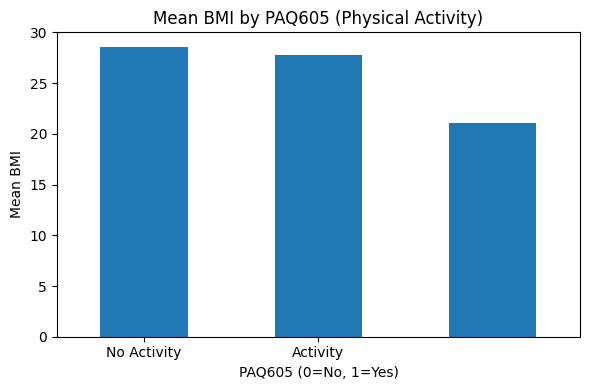

In [18]:
# Ensure the columns exist and are numeric/categorical
if 'PAQ605' in df_copy.columns and 'BMXBMI' in df_copy.columns:
    # Group by PAQ605 and calculate the mean BMI for each group
    bmi_by_paq = df_copy.groupby('PAQ605')['BMXBMI'].mean()

    # Plot the bar chart
    plt.figure(figsize=(6, 4))
    bmi_by_paq.plot(kind='bar')
    plt.title('Mean BMI by PAQ605 (Physical Activity)')
    plt.xlabel('PAQ605 (0=No, 1=Yes)')
    plt.ylabel('Mean BMI')
    plt.xticks(ticks=[0, 1], labels=['No Activity', 'Activity'], rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'PAQ605' and 'BMXBMI' are required for this plot.")

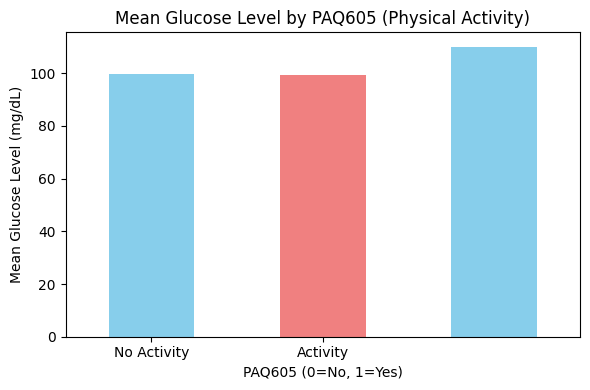

In [19]:
if 'PAQ605' in df_copy.columns and 'LBXGLU' in df_copy.columns:
    # Group by PAQ605 and calculate the mean glucose level for each group
    glucose_by_paq = df_copy.groupby('PAQ605')['LBXGLU'].mean()

    # Plot the bar chart
    plt.figure(figsize=(6, 4))
    glucose_by_paq.plot(kind='bar', color=['skyblue', 'lightcoral'])
    plt.title('Mean Glucose Level by PAQ605 (Physical Activity)')
    plt.xlabel('PAQ605 (0=No, 1=Yes)')
    plt.ylabel('Mean Glucose Level (mg/dL)')
    plt.xticks(ticks=[0, 1], labels=['No Activity', 'Activity'], rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'PAQ605' and 'LBXGLU' are required for this plot.")

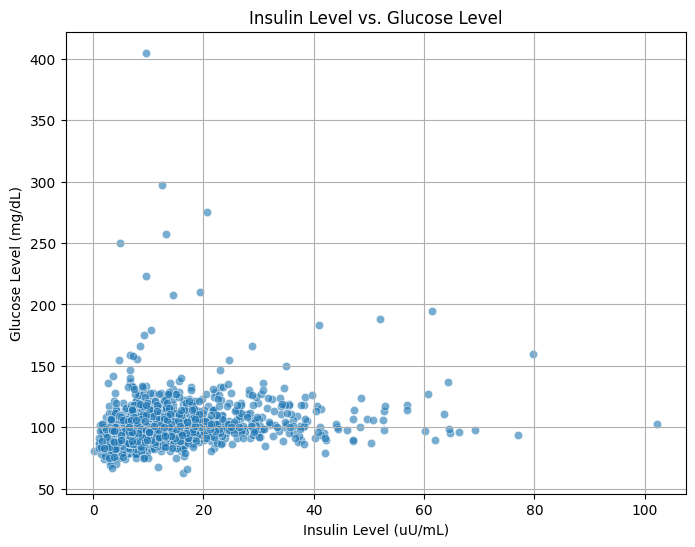

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_copy, x='LBXIN', y='LBXGLU', alpha=0.6)
plt.title('Insulin Level vs. Glucose Level')
plt.xlabel('Insulin Level (uU/mL)')
plt.ylabel('Glucose Level (mg/dL)')
plt.grid(True)
plt.show()

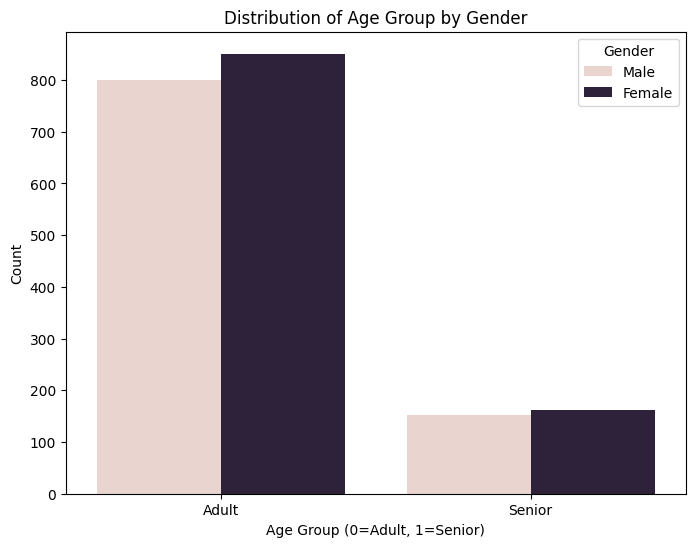

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy, x='age_group', hue='RIAGENDR')
plt.title('Distribution of Age Group by Gender')
plt.xlabel('Age Group (0=Adult, 1=Senior)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Adult', 'Senior'])
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

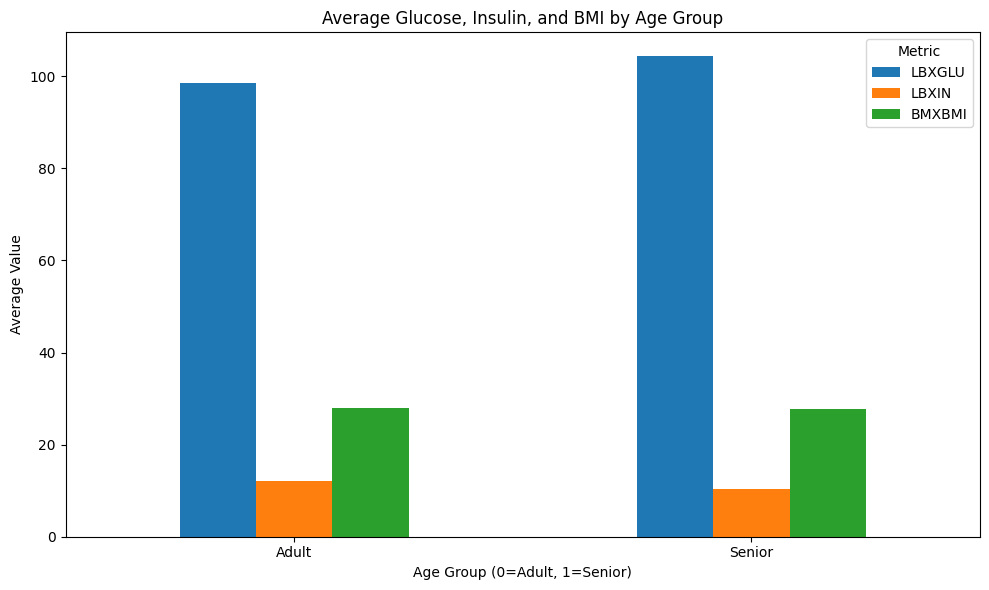

The 'Stroke' column is not found in the DataFrame. Cannot plot stroke distribution.


In [22]:
# prompt: age group compare with glucose level, insuline level, bmi plot all 3 in one plot n stroke distribution

import matplotlib.pyplot as plt
# Group by age_group and calculate the mean of Glucose, Insulin, and BMI
grouped_data = df_copy.groupby('age_group')[['LBXGLU', 'LBXIN', 'BMXBMI']].mean()

# Plotting the grouped bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Average Glucose, Insulin, and BMI by Age Group')
plt.xlabel('Age Group (0=Adult, 1=Senior)')
plt.ylabel('Average Value')
plt.xticks(ticks=[0, 1], labels=['Adult', 'Senior'], rotation=0)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# Assuming 'Stroke' column exists in your DataFrame for stroke distribution
if 'Stroke' in df_copy.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_copy, x='Stroke')
    plt.title('Distribution of Stroke')
    plt.xlabel('Stroke (0=No, 1=Yes)')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['No Stroke', 'Stroke'])
    plt.show()
else:
    print("The 'Stroke' column is not found in the DataFrame. Cannot plot stroke distribution.")

array([[<Axes: title={'center': 'RIAGENDR'}>,
        <Axes: title={'center': 'PAQ605'}>,
        <Axes: title={'center': 'BMXBMI'}>],
       [<Axes: title={'center': 'LBXGLU'}>,
        <Axes: title={'center': 'DIQ010'}>,
        <Axes: title={'center': 'LBXGLT'}>],
       [<Axes: title={'center': 'LBXIN'}>, <Axes: >, <Axes: >]],
      dtype=object)

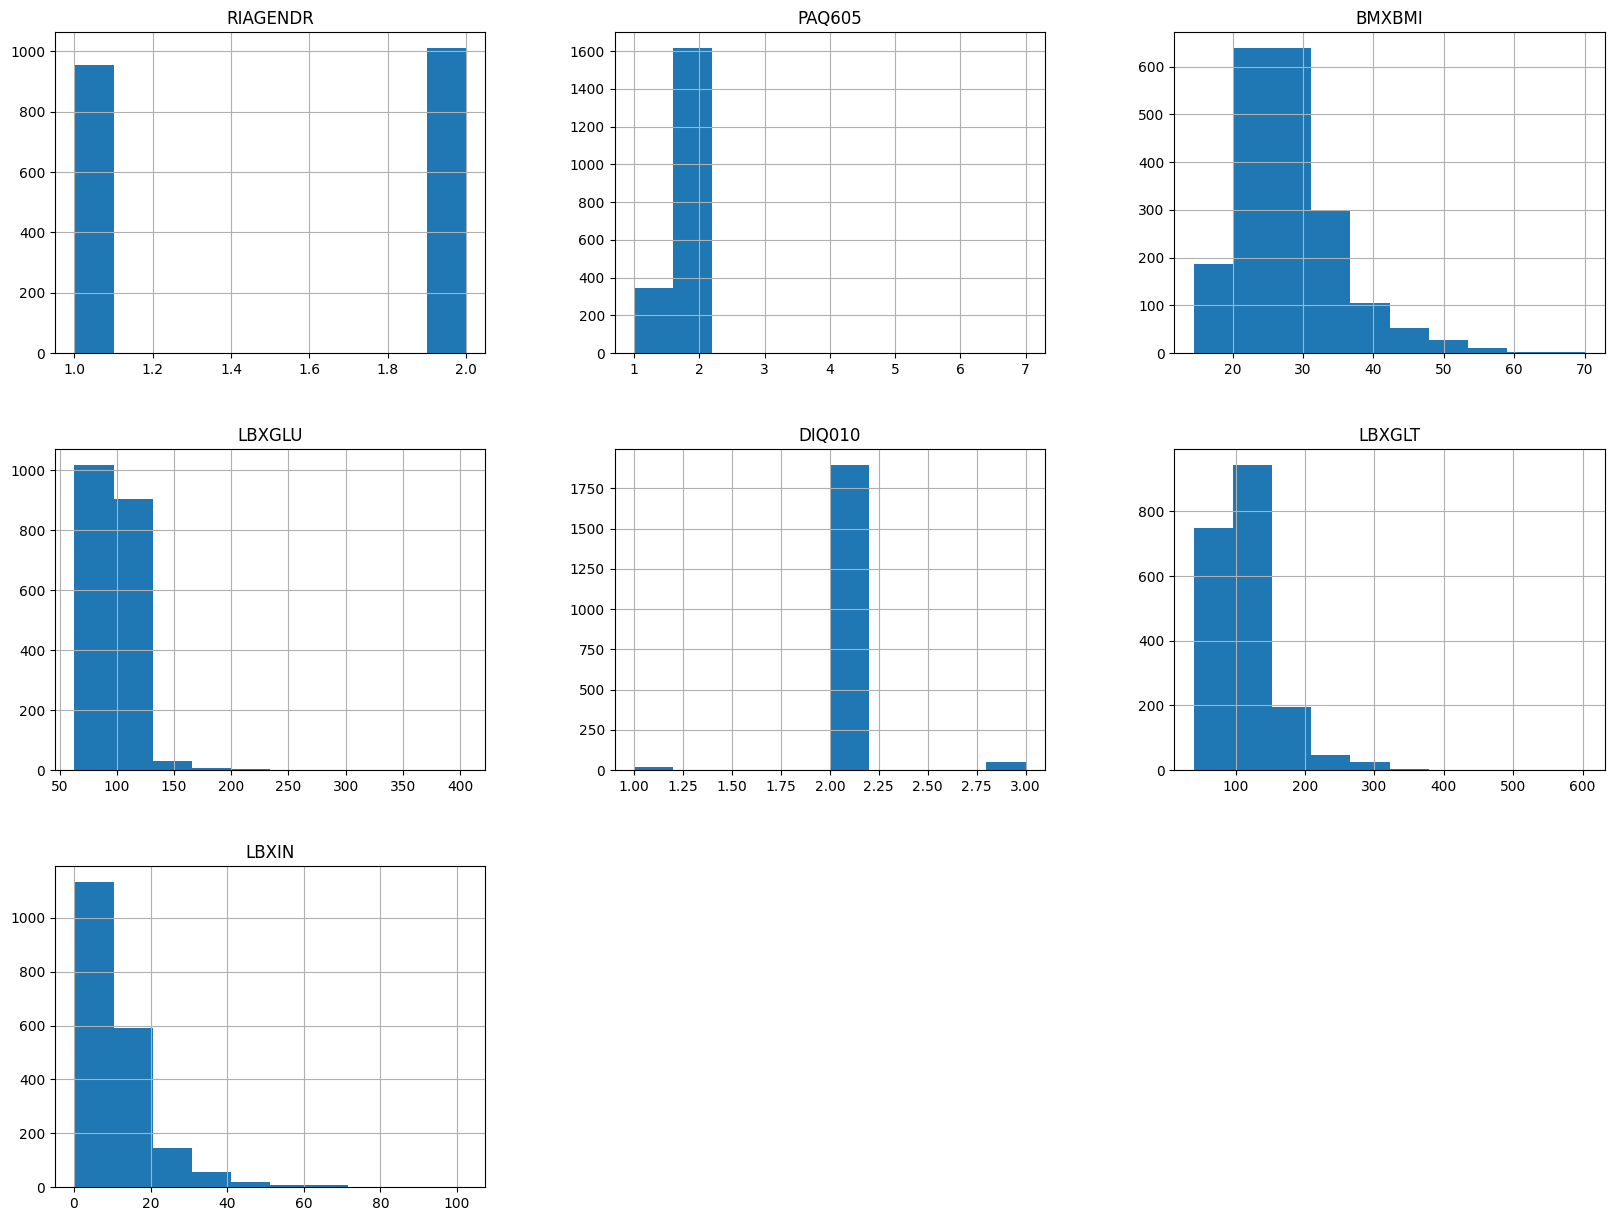

In [23]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df_copy.hist(ax = ax)

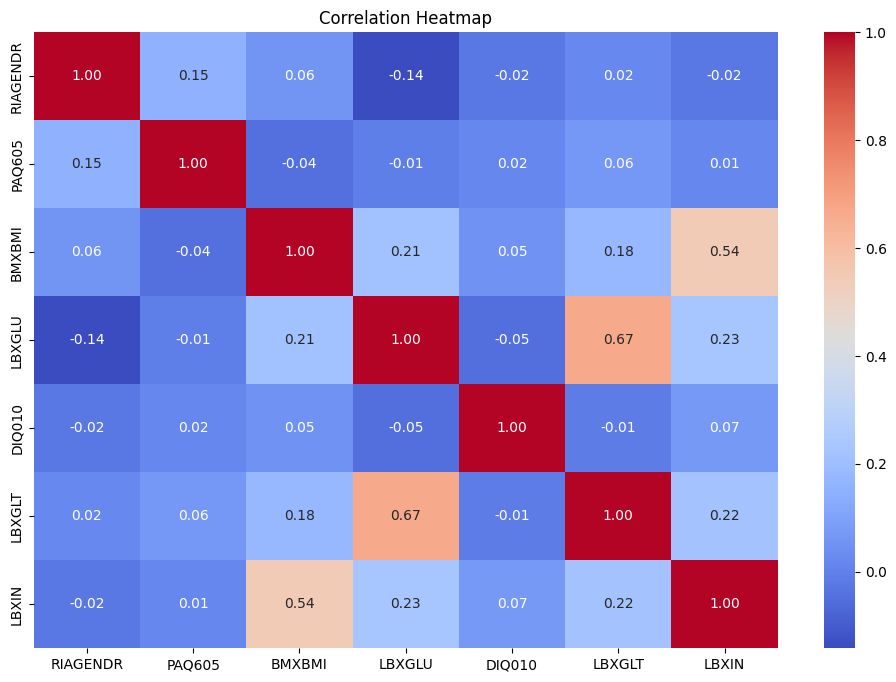

In [24]:
plt.figure(figsize=(12, 8))
# Exclude non-numeric columns before calculating correlation
numeric_df = df_copy.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

X = df_copy.drop('age_group', axis=1)
y = df_copy['age_group']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1572, 57)
Shape of X_test: (394, 57)
Shape of y_train: (1572,)
Shape of y_test: (394,)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model using F1-score
f1 = f1_score(y_test, y_pred, pos_label='Senior')

print(f"F1-score of the Logistic Regression model: {f1:.4f}")

F1-score of the Logistic Regression model: 0.1765


In [29]:
# prompt: random forest n f1 score

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # You can tune n_estimators

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using F1-score
f1_rf = f1_score(y_test, y_pred_rf, pos_label='Senior') # Use the appropriate pos_label if needed

print(f"F1-score of the Random Forest model: {f1_rf:.4f}")

F1-score of the Random Forest model: 0.1111


In [30]:
svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

f1_svm = f1_score(y_test, y_pred_svm, pos_label='Senior') # Use the appropriate pos_label if needed

print(f"F1-score of the SVM model: {f1_svm:.4f}")

F1-score of the SVM model: 0.0000


In [31]:
knn_model = KNeighborsClassifier(n_neighbors=5) # You can tune n_neighbors

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

f1_knn = f1_score(y_test, y_pred_knn, pos_label='Senior')

print(f"F1-score of the K-Nearest Neighbors model: {f1_knn:.4f}")

F1-score of the K-Nearest Neighbors model: 0.2619


Model Comparison based on F1 Score:
                 Model  F1 Score
3  K-Nearest Neighbors  0.261905
0  Logistic Regression  0.176471
1        Random Forest  0.111111
2                  SVM  0.000000


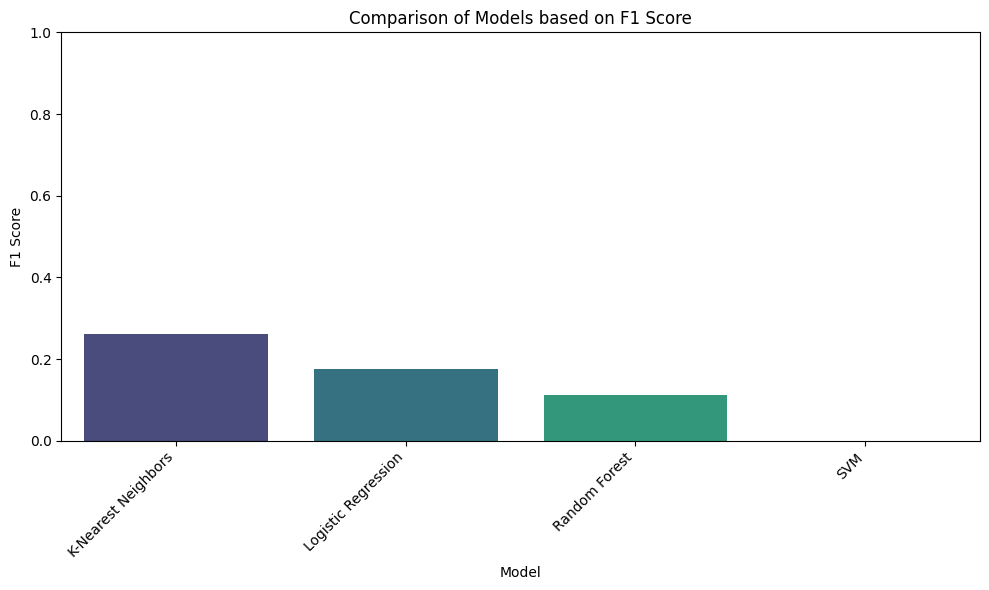

In [40]:
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'K-Nearest Neighbors']
f1_scores = [f1, f1_rf, f1_svm, f1_knn]

comparison_df = pd.DataFrame({'Model': model_names, 'F1 Score': f1_scores})

comparison_df = comparison_df.sort_values(by='F1 Score', ascending=False)

print("Model Comparison based on F1 Score:")
print(comparison_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=comparison_df, palette='viridis')
plt.title('Comparison of Models based on F1 Score')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1) # F1 score is between 0 and 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
!pip install catboost
from catboost import CatBoostClassifier
catboost=CatBoostClassifier(iterations=100,learning_rate=0.03)
catboost.fit(X_train,y_train,verbose=10)
y_catboost_pred=catboost.predict(X_test)
y_catboost_pre_prob=catboost.predict_proba(X_test)[:,1]

0:	learn: 0.6734104	total: 2.22ms	remaining: 220ms
10:	learn: 0.5323344	total: 63.4ms	remaining: 513ms
20:	learn: 0.4616151	total: 124ms	remaining: 468ms
30:	learn: 0.4205054	total: 187ms	remaining: 416ms
40:	learn: 0.3983844	total: 272ms	remaining: 392ms
50:	learn: 0.3855145	total: 355ms	remaining: 341ms
60:	learn: 0.3738433	total: 443ms	remaining: 284ms
70:	learn: 0.3635859	total: 515ms	remaining: 210ms
80:	learn: 0.3558545	total: 596ms	remaining: 140ms
90:	learn: 0.3497617	total: 630ms	remaining: 62.3ms
99:	learn: 0.3450541	total: 702ms	remaining: 0us


In [65]:

y_pred = rf_model.predict(X_test)

submission_df = pd.DataFrame({'age_group': y_pred , adult = 1, senior = 0})
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully.")
print(submission_df.head())

SyntaxError: ':' expected after dictionary key (ipython-input-65-281757301.py, line 3)